benchmark base: https://github.com/py-pdf/benchmarks \
dataset chatgpt: https://www.kaggle.com/datasets/sourceduty/chatgpt-books?resource=download \
dataset llm: https://www.kaggle.com/datasets/tanushreegupta2411/pdfs-llm \
dataset machado: https://www.kaggle.com/datasets/luxedo/machado-de-assis


In [8]:
import os
import fitz  
import pypdfium2 as pdfium
import pdftotext  
from tika import parser  
import time
import matplotlib.pyplot as plt
import numpy as np
import pdfrw
import PyPDF2

In [79]:
def process_pdfs_pymupdf(base_directory):
    start_total_time = time.time()

    for subdir, _, files in os.walk(base_directory):

        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)
                doc = fitz.open(pdf_path)
                text = ""
                for page_num in range(len(doc)):
                    page = doc.load_page(page_num)
                    text += page.get_text()
                    

    end_total_time = time.time()
    total_time = end_total_time - start_total_time

    return total_time

In [59]:
def process_pdfs_pdfrw(base_directory):
    start_total_time = time.time()

    for subdir, _, files in os.walk(base_directory):
        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)

                with pdfrw.PdfReader(pdf_path) as pdf:
                    text = ""
                    for page in pdf.pages:
                        text += page.extract_text()

    end_total_time = time.time()
    total_time = end_total_time - start_total_time

    return total_time

In [60]:
def process_pdfs_pypdfium2(base_directory):
    start_total_time = time.time()

    for subdir, _, files in os.walk(base_directory):

        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)

                pdf = pdfium.PdfDocument(pdf_path)
                text = ""
                for page_num in range(len(pdf)):
                    page = pdf.get_page(page_num)
                    text += page.get_textpage().get_text_range()

    end_total_time = time.time()
    total_time = end_total_time - start_total_time

    return total_time

In [61]:
def process_pdfs_pdftotext(base_directory):
    start_total_time = time.time()

    for subdir, _, files in os.walk(base_directory):

        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)

                with open(pdf_path, "rb") as f:
                    pdf = pdftotext.PDF(f)
                text = "\\n\\n".join(pdf)

    end_total_time = time.time()
    total_time = end_total_time - start_total_time

    return total_time

In [62]:
def process_pdfs_tika(base_directory):
    start_total_time = time.time()

    for subdir, _, files in os.walk(base_directory):

        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)

                raw = parser.from_file(pdf_path)
                text = raw['content'].strip() if raw and raw.get('content') else ''

    end_total_time = time.time()
    total_time = end_total_time - start_total_time

    return total_time

In [63]:
def process_pdfs_pypdf2(base_directory):
    start_total_time = time.time()

    for subdir, _, files in os.walk(base_directory):
        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)
                with open(pdf_path, "rb") as f:
                    pdf = PyPDF2.PdfFileReader(f)
                    text = ""
                    for page_num in range(pdf.getNumPages()):
                        page = pdf.getPage(page_num)
                        text += page.extractText()

    end_total_time = time.time()
    total_time = end_total_time - start_total_time

    return total_time

In [64]:
def process_pdfs_spacypdfreader(base_directory):
    start_total_time = time.time()

    for subdir, _, files in os.walk(base_directory):
        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)
                text = pdf_reader(pdf_path)

    end_total_time = time.time()
    total_time = end_total_time - start_total_time

    return total_time

In [65]:
def plot_execution_times(results):
    libraries = [result[0] for result in results]
    times = [result[1] for result in results]
    sorted_data = sorted(zip(libraries, times), key=lambda x: x[1])
    libraries_sorted, times_sorted = zip(*sorted_data)
    plt.figure(figsize=(10, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(libraries_sorted)))
    bars = plt.bar(libraries_sorted, times_sorted, color=colors)
    for bar, time in zip(bars, times_sorted):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{time:.2f} s', ha='center', va='bottom', fontsize=8)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [66]:
results = []
data = "data"

In [67]:
timepymupdf = process_pdfs_pymupdf(data)
results.append(('PyMuPdf', timepymupdf))

In [68]:
timefium = process_pdfs_pypdfium2(data)
results.append(('pypdfium2', timefium))

/home/vini/dev/Benchmark_lib_pdf/.venv/lib/python3.10/site-packages/pypdfium2/_helpers/textpage.py:80: UserWarning: get_text_range() call with default params will be implicitly redirected to get_text_bounded()
  warnings.warn("get_text_range() call with default params will be implicitly redirected to get_text_bounded()")


In [69]:
timepdfto = process_pdfs_pdftotext(data)
results.append(('pdftotext', timepdfto))

In [70]:
timetika = process_pdfs_tika(data)
results.append(('tika', timetika))

In [71]:
timepdfrw = process_pdfs_tika(data)
results.append(('pdfrw', timepdfrw))

In [72]:
timepypdf2 = process_pdfs_tika(data)
results.append(('PyPdf2', timepypdf2))

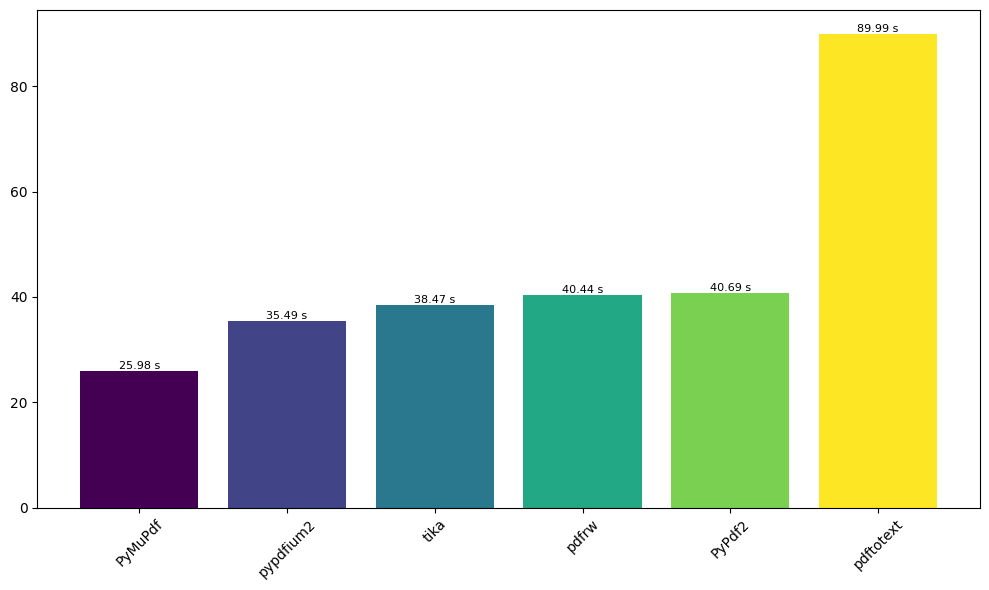

In [73]:
plot_execution_times(results)